<a href="https://colab.research.google.com/github/Ranjan234/FUEL_ECONOMY_PREDICTION_PROJECT./blob/main/FUEL_ECONOMY_PREDICTION_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# OBJECTIVE 1- DATA PREP & EDA

- Import Data,Filling Missing Values, EDA
- Read in the auto-mpg.csv dataset, and check datatypes and columns for missing or unusual values

- Convert ‘origin’ to a categorical feature

- Calculate summary statistics for each of the numeric columns in the dataset including min, max and mean, then build a histogram of the target variable (‘mpg’)

- Explore relationships between the features and the ‘mpg’ column, and use scatterplots and build a correlation heatmap. Which column is most strongly correlated with ‘mpg’?

In [3]:
import pandas as pd
import seaborn as sns

In [4]:
mpg = pd.read_csv('/content/auto-mpg.csv')

In [5]:
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [6]:
mpg.shape

(398, 9)

In [7]:
mpg.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [8]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [9]:
# Change the data type Origin to object.
mpg['origin'] = mpg['origin'].astype('object')

In [10]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   car name      398 non-null    object 
dtypes: float64(3), int64(3), object(3)
memory usage: 28.1+ KB


In [11]:
mpg['horsepower'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [12]:
mpg.query('horsepower == "?"')

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035,20.5,82,1,amc concord dl


In [13]:
mpg['horsepower'] = pd.to_numeric(mpg['horsepower'],errors='coerce')

In [14]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   car name      398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [15]:
mpg['horsepower'] = mpg['horsepower'].fillna(mpg['horsepower'].mean())
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   car name      398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [ ]:
'''  Calculate summary statistics for each of the numeric columns in the datasets, including min, max, and mean.
 Then, build a histogram of the target variable 'mpg'. '''

In [16]:
mpg.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.199187,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,95.000000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


<Axes: xlabel='mpg', ylabel='Count'>

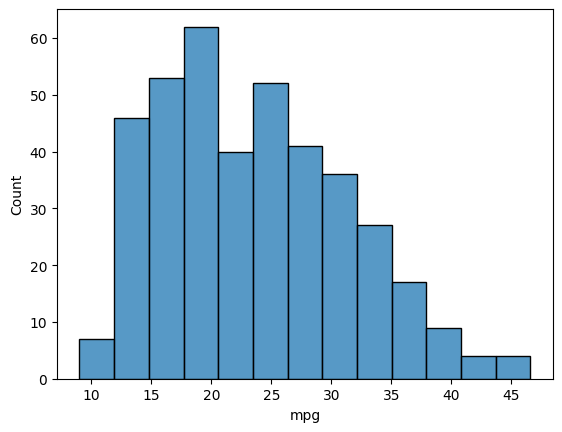

In [17]:
sns.histplot(mpg['mpg'])

In [18]:
''' Explore the relationships between the features and the 'mpg' column. Use Scatterplots and build
 a correlation heatmap. Which column is most strongly correlated with 'mpg.'''

" Explore the relationships between the features and the 'mpg' column. Use Scatterplots and build\n a correlation heatmap. Which column is most strongly correlated with 'mpg."

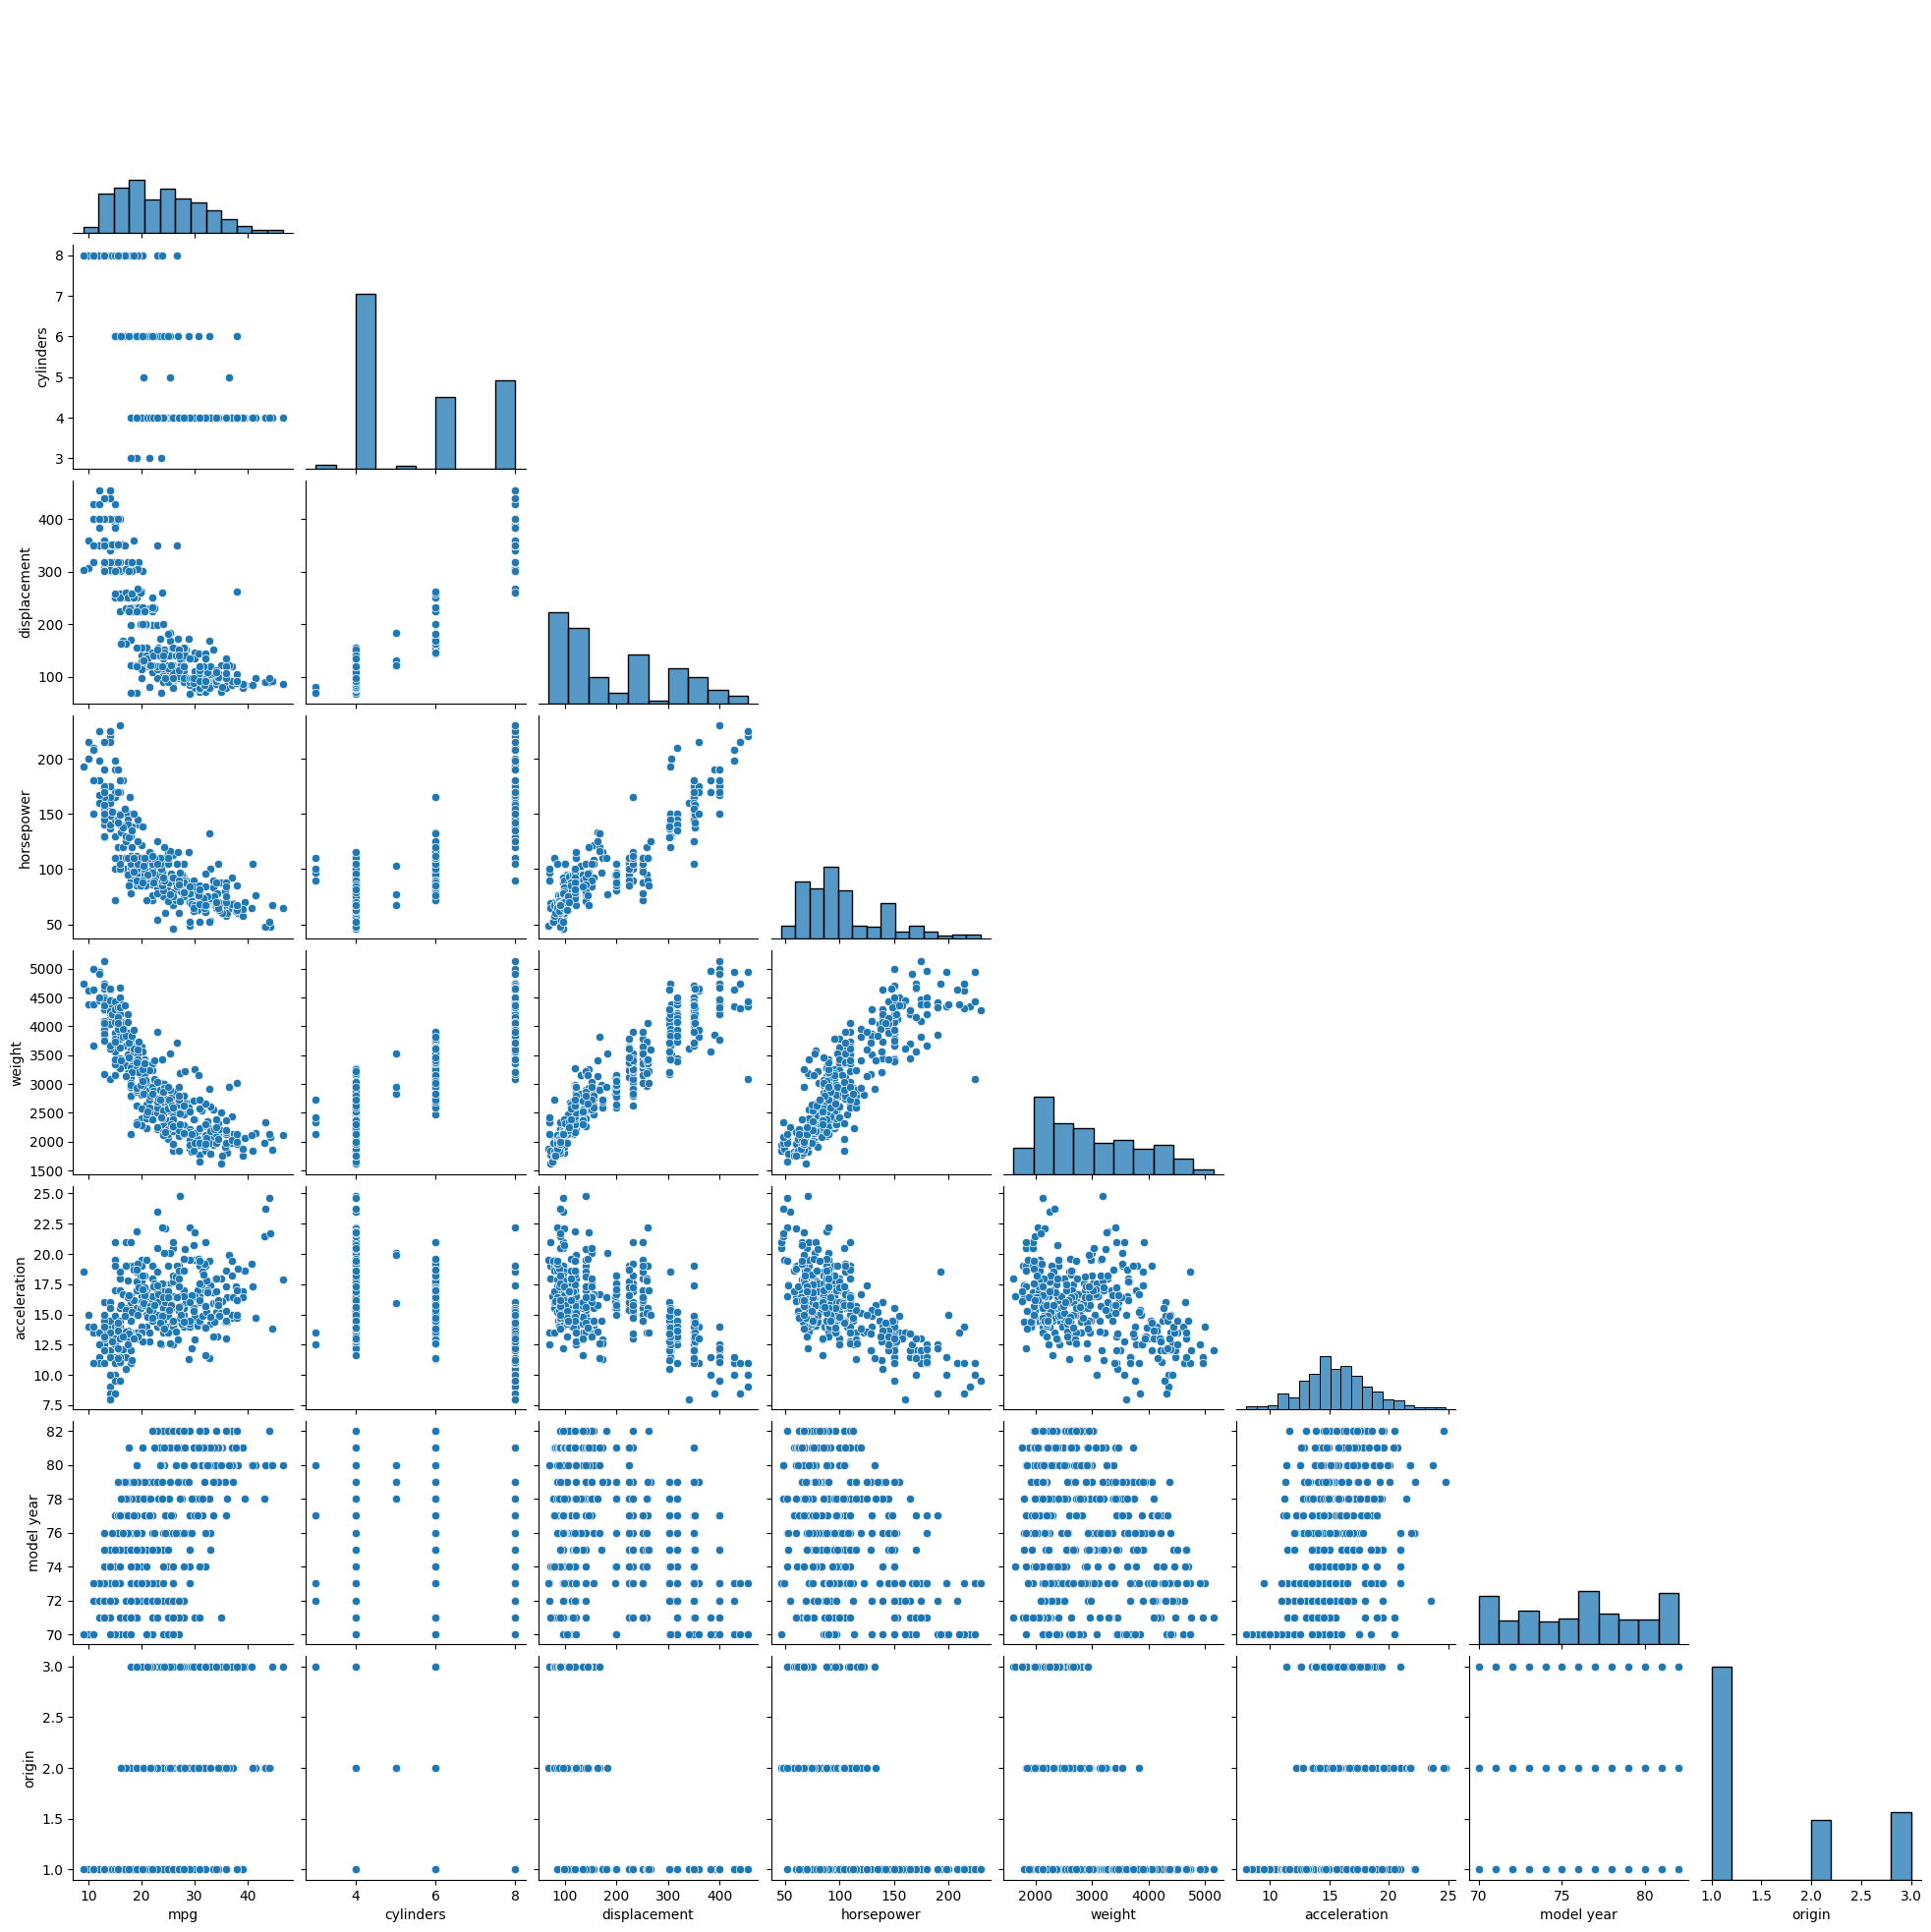

In [18]:
sns.pairplot(mpg, corner= True)

<Axes: xlabel='origin', ylabel='mpg'>

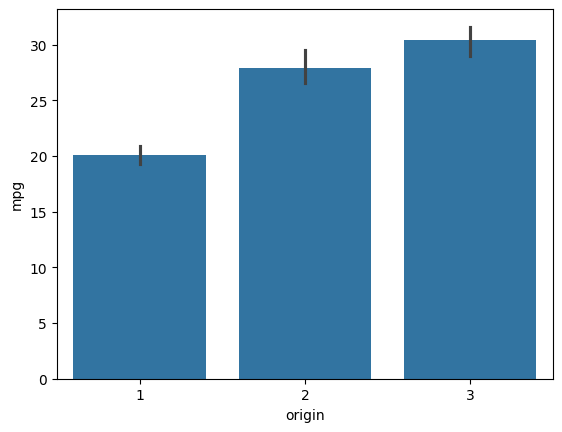

In [19]:
sns.barplot(data =mpg, x = 'origin', y = 'mpg')

In [20]:
mpg.corr(numeric_only= True)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
mpg,1.000000,-0.775396,-0.804203,-0.771437,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.838939,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.893646,0.932824,-0.543684,-0.370164
horsepower,-0.771437,0.838939,0.893646,1.000000,0.860574,-0.684259,-0.411651
weight,-0.831741,0.896017,0.932824,0.860574,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.684259,-0.417457,1.000000,0.288137
model year,0.579267,-0.348746,-0.370164,-0.411651,-0.306564,0.288137,1.000000


<Axes: >

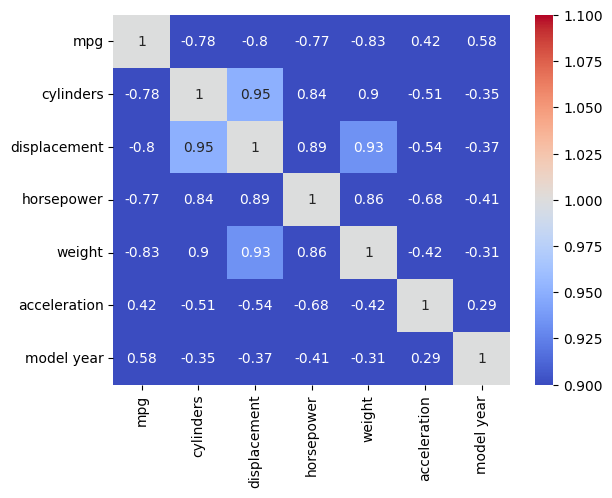

In [21]:
sns.heatmap(
           mpg.corr(numeric_only= True),
            vmin=1,
            vmax =1,
            cmap ='coolwarm',
            annot = True
         )

# OBJECTIVE -2: Split the data and build a multiple regression model

- Split the data into train and test, then then set up a validation scheme of your choice

- Fit a baseline regression model using the feature with the strongest correlation to the target (‘mpg’)


- Fit a multiple regression model. Perform any feature selection and feature engineering necessary, fixing any violated assumptions along the way

In [80]:
mpg_model = mpg.assign(
    weight_2 = mpg["weight"] ** 2

).drop("car name", axis = 1)

mpg_model = pd.get_dummies(mpg_model, drop_first = True)
mpg_model[['origin_2', 'origin_3']] = mpg_model[['origin_2', 'origin_3']].astype(int)

In [81]:
mpg_model.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,weight_2,origin_2,origin_3
0,18.0,8,307.0,130.0,3504,12.0,70,12278016,0,0
1,15.0,8,350.0,165.0,3693,11.5,70,13638249,0,0
2,18.0,8,318.0,150.0,3436,11.0,70,11806096,0,0
3,16.0,8,304.0,150.0,3433,12.0,70,11785489,0,0
4,17.0,8,302.0,140.0,3449,10.5,70,11895601,0,0


In [82]:
# This part is the objective 3

mpg_model = mpg.assign(
    weight_2 = mpg["weight"] ** 2,
      weight_3 = mpg["weight"] ** 3,
    accel2 = mpg["acceleration"] ** 2,
    accel3 = mpg["acceleration"] ** 3,
    hp2 = mpg["horsepower"] ** 2,
    hp3 = mpg["horsepower"] ** 3,
).drop("car name", axis = 1)

mpg_model = pd.get_dummies(mpg_model, drop_first = True)
mpg_model[['origin_2', 'origin_3']] = mpg_model[['origin_2', 'origin_3']].astype(int)

In [83]:
mpg_model.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,weight_2,weight_3,accel2,accel3,hp2,hp3,origin_2,origin_3
0,18.0,8,307.0,130.0,3504,12.0,70,12278016,43022168064,144.00,1728.000,16900.0,2197000.0,0,0
1,15.0,8,350.0,165.0,3693,11.5,70,13638249,50366053557,132.25,1520.875,27225.0,4492125.0,0,0
2,18.0,8,318.0,150.0,3436,11.0,70,11806096,40565745856,121.00,1331.000,22500.0,3375000.0,0,0
3,16.0,8,304.0,150.0,3433,12.0,70,11785489,40459583737,144.00,1728.000,22500.0,3375000.0,0,0
4,17.0,8,302.0,140.0,3449,10.5,70,11895601,41027927849,110.25,1157.625,19600.0,2744000.0,0,0


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score as r2, mean_absolute_error as mae
import statsmodels.api as sm

In [74]:
# Split the data into train and test, then set up a validation scheme of your choice.
features = ['weight',
            'weight_2',
            'cylinders',
            'displacement',
            'horsepower',
            'acceleration',
            'model year',
            'origin_2',
            'origin_3'
]

x = sm.add_constant(mpg_model[features])
y = mpg_model['mpg']

x, x_test, y, y_test=train_test_split(x,y, test_size=0.2, random_state=2023)

In [84]:
# This part is the OBJECTIVE 3
# Split the data into train and test, then set up a validation scheme of your choice.
features = ['weight',
            'weight_2',
            'cylinders',
            'displacement',
            'horsepower',
            'hp2',
            'hp3',
            'acceleration',
            'accel2',
            'accel3',
            'model year',
            'origin_2',
            'origin_3'
]

x = sm.add_constant(mpg_model[features])
y = mpg_model['mpg']

x, x_test, y, y_test=train_test_split(x,y, test_size=0.2, random_state=2023)

In [48]:
#Fit a baseline regression modeling the feature with the strongest correlation to the target.'mpg'
import numpy as np

kf = KFold(n_splits=5, shuffle=True, random_state=2023)

# Create a list to store validation scores for each fold
cv_lm_r2s = []
cv_lm_maes = []

# loop through each fold in x and y
for train_ind, val_ind in kf.split(x):
    x_train, y_train = x.iloc[train_ind], y.iloc[train_ind]
    x_val, y_val = x.iloc[val_ind], y.iloc[val_ind]

    # fit the data model's fold training data
    model = sm.OLS(y_train, x_train).fit()
    # Apend validation score core to list
    cv_lm_r2s.append(r2(y_val, model.predict(x_val),))
    cv_lm_maes.append(mae(y_val, model.predict(x_val),))

print("All validation R2s: ", [round(x, 3) for x in cv_lm_r2s])
print(f"Cross Val R2s: {round(np.mean(cv_lm_r2s), 3)} +- {round(np.std(cv_lm_r2s), 3)}")

print("All validation MAEs: ", [round(x, 3) for x in cv_lm_maes])
print(f"Cross Val MAEs: {round(np.mean(cv_lm_maes), 3)} +- {round(np.std(cv_lm_maes), 3)}")

All validation R2s:  [0.888, 0.846, 0.838, 0.845, 0.84]
Cross Val R2s: 0.851 +- 0.018
All validation MAEs:  [1.814, 2.388, 2.406, 2.17, 2.387]
Cross Val MAEs: 2.233 +- 0.227


In [49]:
def residual_analysis_plots(model):


    import matplotlib.pyplot as plt
    import scipy.stats as stats

    prediction = model.predict()
    residual = model.resid

    fig, ax = plt.subplots(1, 2, sharey = "all", figsize=(10, 6))

    sns.scatterplot(x=prediction, y=residual, ax=ax[0])
    ax[0].set_title("Residual Plot")
    ax[0].set_xlabel("Predicted Values")
    ax[0].set_ylabel("Residuals")

    stats.probplot(residual, dist="norm", plot=ax[1])
    ax[1].set_title("Normal Q-Q Plot")

    plt.tight_layout()
    plt.show()

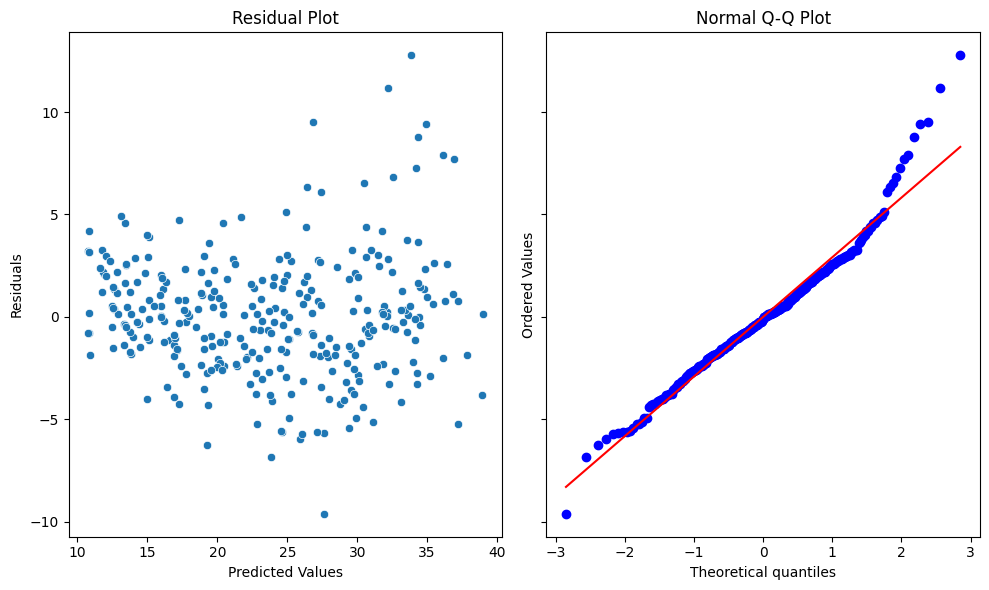

In [61]:
residual_analysis_plots(model)

In [53]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     176.4
Date:                Fri, 01 Aug 2025   Prob (F-statistic):          1.01e-101
Time:                        12:19:02   Log-Likelihood:                -619.73
No. Observations:                 255   AIC:                             1259.
Df Residuals:                     245   BIC:                             1295.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.3469      5.554      0.062      0.950     -10.593      11.287
weight          -0.0206      0.002    -10.972      0.000      -0.024      -0.017
weight_2      2.238e-06   2.82e-07      7.932      0.000    1.68e-06    2.79e-06
cylinders       -0.3086      0.331     -0.931      0.353      -0.961       0.344
displacement     0.0152      0.008      1.818      0.070      -0.001       0.032
horsepower      -0.0237      0.014     -1.651      0.100      -0.052       0.005
acceleration    -0.0648      0.104     -0.620      0.536      -0.270       0.141
model year       0.8498      0.054     15.639      0.000       0.743       0.957
origin_2         2.1248      0.607      3.499      0.001       0.929       3.321
origin_3         1.0057      0.630      1.596      0.112      -0.235       2.247
==============================================================================
Omnibus:                       12.558   Durbin-Watson:                   1.938
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               19.244
Skew:                           0.316   Prob(JB):                     6.63e-05
Kurtosis:                       4.188   Cond. No.                     3.62e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.62e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [63]:
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     395.1
Date:                Fri, 01 Aug 2025   Prob (F-statistic):          1.26e-132
Time:                        12:44:56   Log-Likelihood:                -794.02
No. Observations:                 318   AIC:                             1600.
Df Residuals:                     312   BIC:                             1623.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.4975      4.455     -0.561      0.575     -11.262       6.267
weight        -0.0210      0.002    -12.303      0.000      -0.024      -0.018
weight_2    2.335e-06    2.6e-07      8.991      0.000    1.82e-06    2.85e-06
model year     0.8660      0.048     17.877      0.000       0.771       0.961
origin_2       1.8085      0.513      3.522      0.000       0.798       2.819
origin_3       1.0262      0.548      1.873      0.062      -0.052       2.104
==============================================================================
Omnibus:                       37.035   Durbin-Watson:                   1.899
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               74.827
Skew:                           0.627   Prob(JB):                     5.64e-17
Kurtosis:                       5.019   Cond. No.                     2.96e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.96e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# OBJECTIVE:3 - TEST & INTERPRET MODEL
- Score your final model on the test set, calculating both R2 and MAE. If your test R2 is less than 8, revisit the modelling process

- Interpret your model. What impact does a one-year increase in model year have on the predicted mileage?

- BONUS: Repeat the modelling process using ridge regression. How much better was the ridge model than traditional regression, if at all?

In [68]:
# Score on Test - report R2, and MAE
x_test_with_constant = sm.add_constant(x_test[features])
print(f"Test R2: {r2(y_test, model.predict(x_test_with_constant),)}")
print(f"Test MAE: {mae(y_test, model.predict(x_test_with_constant),)}")

Test R2: 0.8087480897721644
Test MAE: 2.2659313639801724


In [85]:
# Challenge- Ridge Regression
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
x_m = std.fit_transform(x.values)
x_te = std.transform(x_test.values)

In [86]:
from sklearn.linear_model import RidgeCV

n_alphas = 200
alphas = 10 ** np.linspace(-3, 3, n_alphas)

ridge_model = RidgeCV(alphas=alphas, cv=5)
ridge_model.fit(x_m, y)

print(ridge_model.score(x_m, y))
print(mae(y, ridge_model.predict(x_m)))
print(ridge_model.alpha_)

0.8782483046702605
2.059479195374689
0.11226677735108136


In [87]:
print(f"Test R2: {r2(y_test, ridge_model.predict(x_te),)}")
print(f"Test MAE: {mae(y_test, ridge_model.predict(x_te),)}")

Test R2: 0.8116304666558127
Test MAE: 2.2210566031848904


In [88]:
correlation = mpg['weight'].corr(mpg['mpg'])
rounded_correlation = round(correlation, 2)
print(f"The correlation between 'weight' and 'mpg' is: {rounded_correlation}")

The correlation between 'weight' and 'mpg' is: -0.83
